In [6]:
!pip3 install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pandas import json_normalize

# Get data from Worldbank API

In [3]:
# Define the World Bank API URL for total world population (indicator code: SP.POP.TOTL)
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000"

# Fetch data from the World Bank API
response = requests.get(url)
data = response.json()

# Verify we have all the results
assert data[0]["total"] < data[0]["per_page"]

# Flatten the JSON data using json_normalize
population_data = json_normalize(data[1])

# Filter and clean the DataFrame
population_data = population_data[['countryiso3code', 'date', 'country.value', 'value']]
population_data = population_data.rename(columns={'countryiso3code': 'country_code_a3', 'date': 'year', 'country.value': 'country_name', 'value': 'population'})

# Display the population data
population_data.head()

,country_code_a3,year,country_name,population
0,AFE,2022,Africa Eastern and Southern,NaN
1,AFE,2021,Africa Eastern and Southern,702976832.0
2,AFE,2020,Africa Eastern and Southern,685112705.0
3,AFE,2019,Africa Eastern and Southern,667242712.0
4,AFE,2018,Africa Eastern and Southern,649756874.0


# Export CSV

In [4]:
population_data.to_csv("../../data/_processed/processed_population_worldbank.csv",index = False)

# Visualisation

We have all countries

In [10]:
population_data["country"].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle in

But not all the years

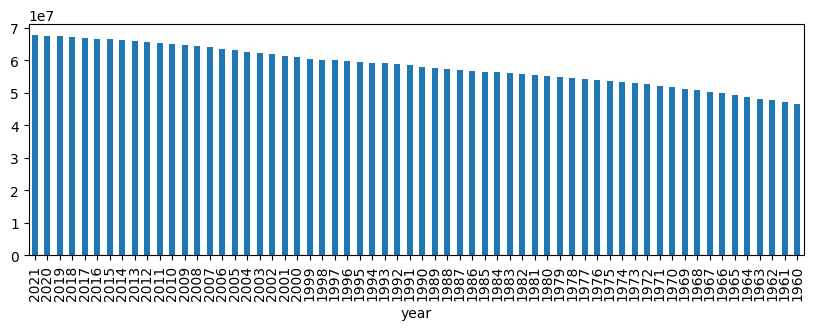

In [11]:
population_data.query("country_code=='FRA'").set_index("year")["population"].plot(kind = "bar",figsize = (10,3))
plt.show()